In [8]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

# Data Imports

In [9]:
Harris_i = pd.read_csv('Data_Folder/HarrisPartI.csv')
Harris_ii = pd.read_csv('Data_Folder/HarrisPartII.csv')
Harris_iii = pd.read_csv('Data_Folder/HarrisPartIII.csv')
VandenBerg = pd.read_csv('Data_Folder/vandenBerg_table2.csv')
Krause21 = pd.read_csv('Data_Folder/Krause21.csv')

In [10]:
#Combine harris i and iii into 1 dataframe

#exclude id column from harris iii
Harris_iii_IDnone = Harris_iii.T.drop('ID')

#Combine Dataframes
Harris_i_iii = Harris_i.join(Harris_iii_IDnone.T)

# Figures

        A
0   False
1   False
2    True
3    True
4    True
..    ...
56   True
57  False
58   True
59  False
60   True

[61 rows x 1 columns]


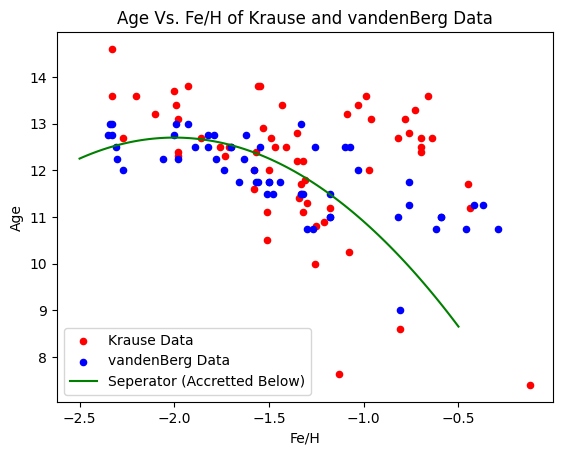

In [11]:
#setting x and y data from Krause for FeH/Age plots
Krause21x = pd.read_csv('Data_folder/Krause21.csv', usecols=['FeH'])
Krause21y = pd.read_csv('Data_Folder/Krause21.csv', usecols=['Age'])

#setting x and y data from vandenBerg for FeH/Age plots
VandenBergx = pd.read_csv('Data_Folder/vandenBerg_table2.csv', usecols=['FeH'])
VandenBergy = pd.read_csv('Data_Folder/vandenBerg_table2.csv', usecols=['Age'])

#Plotting data (Age/FeH) for comparison with (Belokurov, Kravtsov, 2024) - ["In-situ vs. Accretted..." (Figure 3)]
plt.scatter(Krause21x, Krause21y, color='red', label='Krause Data', s=20)
plt.scatter(VandenBergx, VandenBergy, color='blue', label='vandenBerg Data', s=20)

#Creating line
b = 12.7  #peak of curve
m = -1.8  #tightness of curve
x = np.linspace(-2.5, -0.5, num=100)  #limits of curve
y = m*(x+2)**2+b  #the curve (+2 shifts curve left)

#Adding the line to plot
Accretted_Line = plt.plot(x, y, color='green', label='Seperator (Accretted Below)')

#Changing columns names to be able to compare in mask
Krause21x_reset = Krause21x.rename(columns={'FeH': 'A'})
Krause21y_reset = Krause21y.rename(columns={'Age': 'A'})

#Creating mask
mask1 = Krause21y_reset < m*(Krause21x_reset+2)**2+b
print(mask1)

plt.legend()
plt.xlabel('Fe/H')
plt.ylabel('Age')
plt.title('Age Vs. Fe/H of Krause and vandenBerg Data')

plt.show()

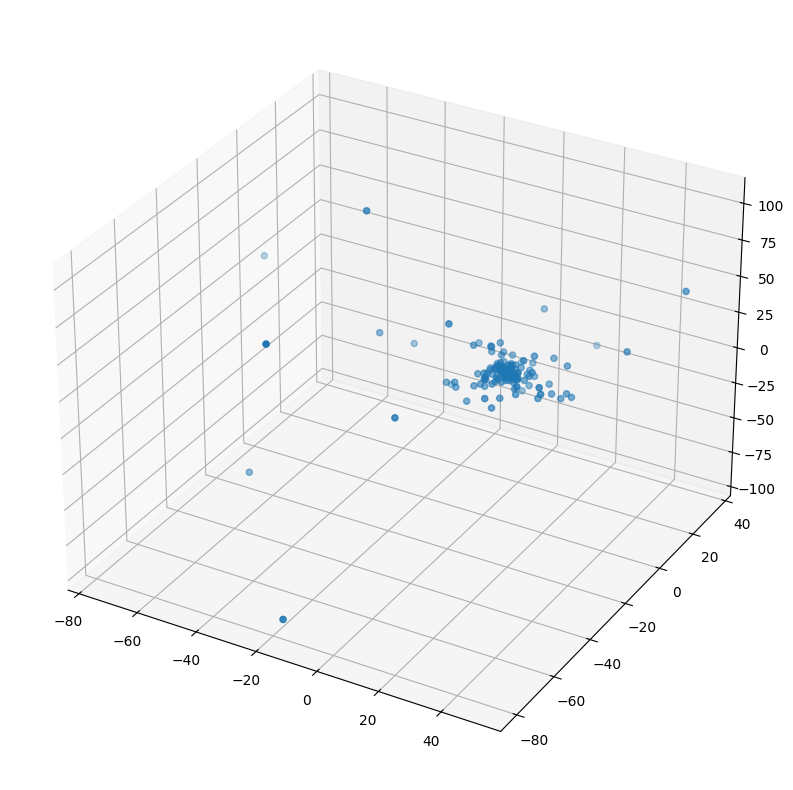

In [12]:
# The aim of this block of code is to create a 3D scatterplot of the Harris Part 1 data.
# This can then be used to identify GC near the outer halo which are likely globular clusters

# This code takes Part 1 of the Harris data and seperates the X, Y, and Z coordinates into seperate lists
HarrisIX = pd.read_csv('Data_folder/HarrisPartI.csv', usecols=['X'])
HarrisIY = pd.read_csv('Data_folder/HarrisPartI.csv', usecols=['Y'])
HarrisIZ = pd.read_csv('Data_folder/HarrisPartI.csv', usecols=['Z'])

# These next lines of code create a 3D scatterplot of the X, Y, and Z coordinates:
# The figsize parameters have been chosen by scanning the HarrisPartI.csv file and checking
# a rough range of the largest values
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

# These two lines make a visual graph of the scatterplot
ax.scatter(HarrisIX, HarrisIY, HarrisIZ)
plt.show()